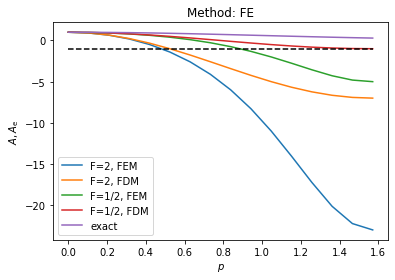

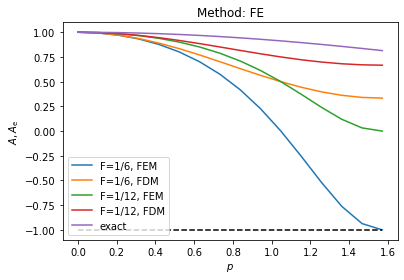

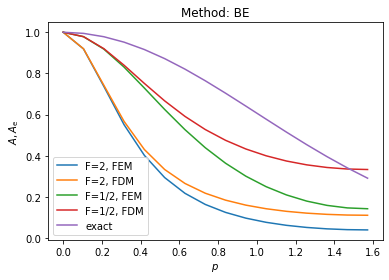

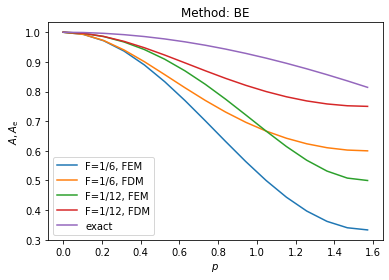

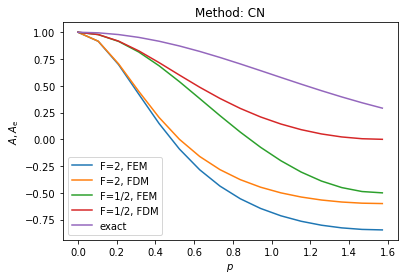

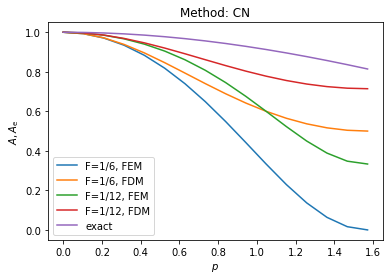

In [1]:
import matplotlib.pyplot as plt 

def A_FE(p, C, lumped=False):
    f = 1 if lumped else 1 - (2./3)*sin(p)**2
    return 1 - 4*C*sin(p)**2/f

def A_BE(p, C, lumped=False):
    f = 1 if lumped else 1 - (2./3)*sin(p)**2
    return 1/(1 + 4*C*sin(p)**2/f)  # 1 for sympy

def A_CN(p, C, lumped=False):
    f = 1 if lumped else 1 - (2./3)*sin(p)**2
    return (1 - 2*C*sin(p)**2/f)/(1 + 2*C*sin(p)**2/f)

def A_exact(p, C):
    return exp(-C*p**2)

methods = {'FE': A_FE, 'BE': A_BE, 'CN': A_CN}
F_values_coarse = {'2': 2, '1/2': 0.5}       # coarse mesh
F_values_fine = {'1/6': 1./6, '1/12': 1./12}  # fine mesh
from numpy import *

n = 16
p = linspace(0, pi/2, n)
for method in methods:
    for F_values in [F_values_coarse, F_values_fine]:
        plt.figure()
        legends = []
        for F_name in F_values:
            C = F_values[F_name]
            A_e = A_exact(p, C)
            func = eval('A_' + method)
            A_FEM = func(p, C, False)
            A_FDM = func(p, C, True)
            legends.append('F=%s, FEM' % F_name)
            legends.append('F=%s, FDM' % F_name)
            plt.plot(p, A_FEM, p, A_FDM)
        plt.plot(p, A_e)
        legends.append('exact')
        plt.legend(legends, loc='lower left')
        if method == 'FE':
            plt.plot([0, pi/2], [-1, -1], 'k--')
        plt.title('Method: %s' % method)
        plt.xlabel('$p$'); plt.ylabel(r'$A, A_{\rm e}$')
        filestem = 'diffu_A_factors_%s_%s' % \
                   ('coarse' if F_values == F_values_coarse else 'fine', method)
        plt.savefig(filestem + '.png')
        plt.savefig(filestem + '.pdf')
